In this notebook I'll wrangle the data for my capstone 2 project. 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re
#from library.sb_utils import save_file

Next I'll upload my data. My primary source is the district snapshot. This dataset is highly descriptive but lacks readability so I'll likely have to take a look at if all the information contained is relevant. I'll also upload a more descriptive dataset of teacher salaries and private school information. I'll go through the data to make sure there are no issues and then join it into one dataframe. 

In [2]:
wdir = os.getcwd()
print(wdir)

C:\Users\Armstrongs\Desktop\GitHub\Capstone2


In [3]:
directories = os.listdir()
print(directories)

['.git', '.ipynb_checkpoints', 'Capstone 2 Data Wrangling.ipynb', 'district_summary.csv', 'privateSchoolData - allSchoolData.csv', 'Staff Salary FTE Report_Statewide_Districts_2019-2020 - Staff Salary FTE Report_Statewide_Districts_2019-2020.csv']


In [4]:
snapshot2019 = pd.read_csv('district_summary.csv')

In [5]:
print(type(snapshot2019))

<class 'pandas.core.frame.DataFrame'>


In [6]:
snapshot2019.head()

,DISTNAME,DISTRICT,DZCNTYNM,REGION,DZRATING,DZCAMPUS,DPETALLC,DPETBLAP,DPETHISP,DPETWHIP,...,DPFPAVOCP,DPFPAGIFP,DPFPAATHP,DPFPAHSAP,DPFPREKP,DPFPAOTHP,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
0,CAYUGA ISD,1902,001 ANDERSON,7,A,3,564,3.5,6.7,84.8,...,2.8,0.1,3.6,0.6,0.3,20.8,500 to 999,Rural,"$442,675 to < $456,961",Under $1.1701
1,ELKHART ISD,1903,001 ANDERSON,7,A,5,1254,5.4,11.3,78.1,...,7.8,0.1,3.4,1,0,25.7,"1,000 to 1,599",Non-metropolitan Stable,"$164,221 to < $208,918",$1.3050 to under $1.4272
2,FRANKSTON ISD,1904,001 ANDERSON,7,B,3,803,8.2,8.2,78.2,...,6.9,0.1,7.3,1,1.1,28.2,500 to 999,Rural,"$272,534 to < $299,260",$1.4272 and over
3,NECHES ISD,1906,001 ANDERSON,7,A,2,366,8.5,13.9,73.2,...,4,0.3,0,1.2,0.5,35.1,Under 500,Rural,"$272,534 to < $299,260",$1.4272 and over
4,PALESTINE ISD,1907,001 ANDERSON,7,B,6,3389,26.6,41.2,27.5,...,3.9,0.2,3.4,0.7,2.1,28.3,"3,000 to 4,999",Independent Town,"$299,260 to < $316,695",$1.4272 and over


In [7]:
#changing the column "district" to solve a conflict futher down
snapshot2019.rename({'DISTRICT' : 'D'}, axis=1, inplace=True)

In [8]:
snapshotcolnames = ['DISTNAME',
'DISTRICT #',
'DZCNTYNM',
'REGION',
'DZRATING',
'DZCAMPUS',
'total students',
'4. Students % African American: ',
'5. Students % Hispanic: ',
'6. Students % White:' ,
'7. Students % American Indian:' ,
'8. Students % Asian:',
'9. Students % Pacific Islander:' ,
'10. Students % Two or More Races:',
'11. Students % Economically Disadvantaged:',
'12. Students % English Learners (EL):' ,
'13. Students % Special Education:' ,
'14. Students % Bilingual/ESL Education:' ,
'15. Students % Career and Technical Education:',
'16. Students % Gifted and Talented Education:' ,
'17. Attendance Rate (2017-18):' ,
'18. Annual Dropout Rate Gr. 9-12 (2017-18):' ,
'19. 4-Year Longitudinal Graduation Rate (Class of 2018):',
'20. 5-Year Longitudinal Graduation Rate (Class of 2017):',
'21. 6-Year Longitudinal Graduation Rate (Class of 2016):',
'22. Annual Graduate Count (2017-18):',
'23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):',
'staar all subjects approach',
'staar all subjects meet',
'staar all subjects master',
'staar elar approach',
'staar elar meets',
'staar elar master',
'staar write approach',
'staar write meet',
'staar write master',
'staar math approach',
'staar math meet',
'staar math master',
'staar science approach',
'staar science meet',
'staar science master',
'staar social approach',
'staar social meet',
'staar social master',
'staar african approach',
'staar african meet',
'staar african master',
'staar hispanic approach',
'staar hispanic meet',
'staar hispanic master',
'staar white approach',
'staar white meet',
'staar white master',
'staar native approach',
'staar native meet',
'staar native master',
'staar asian approach',
'staar asian meet',
'staar asian master',
'staar pacific approach',
'staar pacific meet',
'staar pacific master',
'2+ race approach',
'2+ race meet',
'2+ race master',
'econ disad approach',
'econ disad meet',
'econ disad master',
'38. SAT/ACT Results - % Tested (2017-2018):' ,
'39. SAT/ACT Results - % At or Above Criterion (2017-2018): ',
'40. SAT - Average Score (2017-2018):' ,
'41. ACT - Average Score (2017-2018):',
'42. Total Staff FTE:' ,
'43. Total Teacher FTE: ',
'44. Staff % Central Administration:' ,
'45. Staff % Campus Administration:' ,
'46. Staff % Professional Support:' ,
'47. Staff % Teachers:',
'48. Staff % Educational Aides:' ,
'49. Staff % Auxiliary:' ,
'50. Average Central Administrative Salary:' ,
'51. Average Campus Administrative Salary:',
'52. Average Professional Support Staff Salary:',
'53. Average Teacher Salary:' ,
'54. Staff % Minority:' ,
'55. Number of Students Per Total Staff: ',
'56. Number of Students Per Teacher:' ,
'57. Teacher % With 5 or Fewer Years of Experience: ',
'58. Teacher Average Years of Experience:' ,
'59. Teacher % With Advanced Degrees:',
'60. Teacher Turnover Rate:' ,
'61. Teacher % African American:',
'62. Teacher % Hispanic:' ,
'63. Teacher % White:' ,
'64. Teacher % Other:' ,
'65. Teacher % Regular Education:' ,
'66. Teacher % Special Education:',
'67. Teacher % Compensatory Education:' ,
'68. Teacher % Bilingual/ESL Education:' ,
'69. Teacher % Career and Technical Education:' ,
'70. Teacher % Other Education (Includes Gifted and Talented):' ,
'71. Taxable Value Per Pupil (2016 Tax Year):' ,
'72. Locally Adopted Tax Rate (2017 Tax Year):' ,
'73. Total Operating and Other Revenue (2017-18):',
'74. Total Operating and Other Revenue Per Pupil:' ,
'75. Total Operating Revenue (2017-18):' ,
'76. Operating Revenue % State:' ,
'77. Operating Revenue % Local and Other:',
'78. Operating Revenue % Federal:' ,
'79. Total Other Revenue (2017-18):' ,
'80. Fund Balance (For ISDs):' ,
'81. Net Assets (Charter Schools):' ,
'82. Total Actual Expenditures (2017-18): ',
'83. Total Actual Operating Expenditures (2017-18):' ,
'84. Total Actual Operating Expenditures Per Pupil:',
'85. Expenditure % Instructional:' ,
'86. Expenditure % Central Administrative: ',
'87. Expenditure % School Leadership:' ,
'88. Expenditure % Plant Services: ',
'89. Expenditure % Other Operating:' ,
'90. Total Actual Instructional Expenditures (2017-2018):' ,
'91. Total Actual Instructional Expenditures Per Pupil:',
'92. Expenditures % Basic Education Services: ',
'93. Expenditures % Special Education:',
'94. Expenditures % State Compensatory Education:',
'95. Expenditures % Bilingual/ESL Education:',
'96. Expenditures % Career and Technical Education:' ,
'97. Expenditures % Gifted and Talented Education:',
'98. Expenditures % Athletics/Related Activities:' ,
'99. Expenditures % High School Allotment:',
'100. Expenditures % Prekindergarten:',
'101. Expenditures % Un-Allocated:',
'DISTSIZE',
'COMMTYPE',
'PROPWLTH',
'TAXRATE',
                   ]
#These were generated by using this dictionary
#https://rptsvr1.tea.texas.gov/perfreport/snapshot/2019/itemdef.html
#and comparing the dataset against a report for a specific district
#Example: https://rptsvr1.tea.texas.gov/perfreport/snapshot/2019/district.srch.html search CAYUGA ISD
#and compare values to dataset.

In [9]:
codedcolnames = [code for code in snapshot2019.columns]

In [10]:
codedcolnames[:5]

['DISTNAME', 'D', 'DZCNTYNM', 'REGION', 'DZRATING']

In [11]:
#I want to make sure that the new column names match the values for the dataframe exactly. They should be the same length. 
print(len(snapshotcolnames))
print(len(codedcolnames))

137
137


In [12]:
valuesdict = {}
for key in snapshotcolnames:
    for value in codedcolnames:
        valuesdict[key] = value
        codedcolnames.remove(value)
        break  

In [13]:
valuesdict

{'DISTNAME': 'DISTNAME',
 'DISTRICT #': 'D',
 'DZCNTYNM': 'DZCNTYNM',
 'REGION': 'REGION',
 'DZRATING': 'DZRATING',
 'DZCAMPUS': 'DZCAMPUS',
 'total students': 'DPETALLC',
 '4. Students % African American: ': 'DPETBLAP',
 '5. Students % Hispanic: ': 'DPETHISP',
 '6. Students % White:': 'DPETWHIP',
 '7. Students % American Indian:': 'DPETINDP',
 '8. Students % Asian:': 'DPETASIP',
 '9. Students % Pacific Islander:': 'DPETPCIP',
 '10. Students % Two or More Races:': 'DPETTWOP',
 '11. Students % Economically Disadvantaged:': 'DPETECOP',
 '12. Students % English Learners (EL):': 'DPETLEPP',
 '13. Students % Special Education:': 'DPETSPEP',
 '14. Students % Bilingual/ESL Education:': 'DPETBILP',
 '15. Students % Career and Technical Education:': 'DPETVOCP',
 '16. Students % Gifted and Talented Education:': 'DPETGIFP',
 '17. Attendance Rate (2017-18):': 'DA0AT18R',
 '18. Annual Dropout Rate Gr. 9-12 (2017-18):': 'DA0912DR18R',
 '19. 4-Year Longitudinal Graduation Rate (Class of 2018):': 'DAG

In [14]:
#Examine district of interest
cleburne = snapshot2019[snapshot2019['DISTNAME'] == 'CLEBURNE ISD'].T
cleburne

,669
DISTNAME,CLEBURNE ISD
D,126903
DZCNTYNM,126 JOHNSON
REGION,11
DZRATING,C
...,...
DPFPAOTHP,25.9
DISTSIZE,"5,000 to 9,999"
COMMTYPE,Other Central City Suburban
PROPWLTH,"$355,684 to < $378,489"


In [15]:
#It looks like there is no missing data for Cleburne ISD
[datapoint for datapoint in list(cleburne.iloc[:,0]) if datapoint == '.']

[]

In [16]:
snapshotcolnames[:8]

['DISTNAME',
 'DISTRICT #',
 'DZCNTYNM',
 'REGION',
 'DZRATING',
 'DZCAMPUS',
 'total students',
 '4. Students % African American: ']

In [17]:
colnames = [i for i in snapshot2019.columns]
colnames[:8]

['DISTNAME',
 'D',
 'DZCNTYNM',
 'REGION',
 'DZRATING',
 'DZCAMPUS',
 'DPETALLC',
 'DPETBLAP']

In [18]:
#I want to rename my columns to be more readable. 

renamecolumns = {}
snapshotcolnames2 = snapshotcolnames
for k in colnames:
    for v in snapshotcolnames2:
        renamecolumns[k] = v
        snapshotcolnames2.remove(v)
        break 
        
 

In [19]:
renamecolumns

{'DISTNAME': 'DISTNAME',
 'D': 'DISTRICT #',
 'DZCNTYNM': 'DZCNTYNM',
 'REGION': 'REGION',
 'DZRATING': 'DZRATING',
 'DZCAMPUS': 'DZCAMPUS',
 'DPETALLC': 'total students',
 'DPETBLAP': '4. Students % African American: ',
 'DPETHISP': '5. Students % Hispanic: ',
 'DPETWHIP': '6. Students % White:',
 'DPETINDP': '7. Students % American Indian:',
 'DPETASIP': '8. Students % Asian:',
 'DPETPCIP': '9. Students % Pacific Islander:',
 'DPETTWOP': '10. Students % Two or More Races:',
 'DPETECOP': '11. Students % Economically Disadvantaged:',
 'DPETLEPP': '12. Students % English Learners (EL):',
 'DPETSPEP': '13. Students % Special Education:',
 'DPETBILP': '14. Students % Bilingual/ESL Education:',
 'DPETVOCP': '15. Students % Career and Technical Education:',
 'DPETGIFP': '16. Students % Gifted and Talented Education:',
 'DA0AT18R': '17. Attendance Rate (2017-18):',
 'DA0912DR18R': '18. Annual Dropout Rate Gr. 9-12 (2017-18):',
 'DAGC4X18R': '19. 4-Year Longitudinal Graduation Rate (Class of 

In [20]:
readablesnapshot = snapshot2019.rename(renamecolumns, axis=1)

In [21]:
readablesnapshot.head()

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
0,CAYUGA ISD,1902,001 ANDERSON,7,A,3,564,3.5,6.7,84.8,...,2.8,0.1,3.6,0.6,0.3,20.8,500 to 999,Rural,"$442,675 to < $456,961",Under $1.1701
1,ELKHART ISD,1903,001 ANDERSON,7,A,5,1254,5.4,11.3,78.1,...,7.8,0.1,3.4,1,0,25.7,"1,000 to 1,599",Non-metropolitan Stable,"$164,221 to < $208,918",$1.3050 to under $1.4272
2,FRANKSTON ISD,1904,001 ANDERSON,7,B,3,803,8.2,8.2,78.2,...,6.9,0.1,7.3,1,1.1,28.2,500 to 999,Rural,"$272,534 to < $299,260",$1.4272 and over
3,NECHES ISD,1906,001 ANDERSON,7,A,2,366,8.5,13.9,73.2,...,4,0.3,0,1.2,0.5,35.1,Under 500,Rural,"$272,534 to < $299,260",$1.4272 and over
4,PALESTINE ISD,1907,001 ANDERSON,7,B,6,3389,26.6,41.2,27.5,...,3.9,0.2,3.4,0.7,2.1,28.3,"3,000 to 4,999",Independent Town,"$299,260 to < $316,695",$1.4272 and over


In [22]:
#Let's see how many missing values there are by column. Missing values are noted here with a '.'
#Note 

In [23]:
renamecolumns['DA0912DR18R']

'18. Annual Dropout Rate Gr. 9-12 (2017-18):'

In [24]:
test = readablesnapshot.iloc[:40,21]

In [25]:
test.replace('.',np.NaN)

0       0
1       0
2     0.4
3     0.9
4       0
5     0.4
6       0
7     0.5
8     0.4
9     1.3
10    1.4
11    1.2
12    0.8
13    1.6
14    0.2
15    1.9
16      0
17      0
18      0
19    1.8
20      0
21    0.9
22    2.1
23    0.8
24    0.5
25    0.8
26      2
27      0
28      0
29      1
30    1.4
31    0.3
32    1.8
33    0.3
34      0
35    1.7
36    NaN
37    1.6
38    NaN
39    3.6
Name: 18. Annual Dropout Rate Gr. 9-12 (2017-18):, dtype: object

In [26]:
# replacing '.' with nan for simpler standard analysis
readablesnapshot.replace('.',np.NaN, inplace=True)

In [27]:
missing = pd.concat([readablesnapshot.isnull().sum(), 100 * readablesnapshot.isnull().mean()], axis=1)

In [28]:
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
DISTNAME,0,0.000000
COMMTYPE,0,0.000000
DISTSIZE,0,0.000000
PROPWLTH,0,0.000000
16. Students % Gifted and Talented Education:,0,0.000000
...,...,...
staar native meet,438,36.469609
staar native approach,438,36.469609
staar pacific master,800,66.611157
staar pacific meet,800,66.611157


In [29]:
#Dropping the ones with complete data to get a better picture
missingshort = missing[missing['count'] > 10]
missingshort

,count,%
18. Annual Dropout Rate Gr. 9-12 (2017-18):,113,9.408826
19. 4-Year Longitudinal Graduation Rate (Class of 2018):,143,11.906744
20. 5-Year Longitudinal Graduation Rate (Class of 2017):,150,12.489592
21. 6-Year Longitudinal Graduation Rate (Class of 2016):,155,12.905912
22. Annual Graduate Count (2017-18):,132,10.990841
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,132,10.990841
staar write approach,32,2.664446
staar write meet,32,2.664446
staar write master,32,2.664446
staar social approach,38,3.164030


It looks like most of the missing data has to do with staar scores for certain demographics. I might imagine that these values represent areas with little or no representation of the respective race, but since this database also uses zeros for those columns I think it is more accurate to suggest that the data is missing. 

Since racial staar data might not be useful for determining actionable steps to increasing the graduation rate I'll drop those columns. I'll also drop multi-year graduation rate since it's missing too much data to be useful. I'll keep SAT and ACT averages because those seem like important factors for determining graduation rates. If the districts with missing SAT averages are usually the same districts with missing ACT averages I'll just drop those rows. Otherwise I'll use the mean. 

In [30]:
removestaarlist = ['staar african approach',
'staar african meet',
'staar african master',
'staar hispanic approach',
'staar hispanic meet',
'staar hispanic master',
'staar white approach',
'staar white meet',
'staar white master',
'staar native approach',
'staar native meet',
'staar native master',
'staar asian approach',
'staar asian meet',
'staar asian master',
'staar pacific approach',
'staar pacific meet',
'staar pacific master',
'2+ race approach',
'2+ race meet',
'2+ race master',
'19. 4-Year Longitudinal Graduation Rate (Class of 2018):',
'20. 5-Year Longitudinal Graduation Rate (Class of 2017):',
'21. 6-Year Longitudinal Graduation Rate (Class of 2016):']
readablesnapshot.drop(columns=removestaarlist, inplace=True)

In [31]:
missing = pd.concat([readablesnapshot.isnull().sum(), 100 * readablesnapshot.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')
missing[missing['%']>1 ]

,count,%
18. Annual Dropout Rate Gr. 9-12 (2017-18):,113,9.408826
22. Annual Graduate Count (2017-18):,132,10.990841
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,132,10.990841
staar write approach,32,2.664446
staar write meet,32,2.664446
staar write master,32,2.664446
staar social approach,38,3.164030
staar social meet,38,3.164030
staar social master,38,3.164030
38. SAT/ACT Results - % Tested (2017-2018):,125,10.407993


In [32]:
#Note to self: Now you have to go through each item on the above list and decide how to handle the missing data on a case by
#case basis. Then you'll have to go through the entire dataset and decide whether to use means for missing data, a minimum value
#, or drop the row altogether. It might be dangerious to start dropping every row that's missing a value. There are very few 
# features that have no missing values.

In [33]:
#The dataset was too unwieldy. I've broken it down to examine the chunks and fix missing data.
rss1 = readablesnapshot.iloc[:,0:20]
rss2 = readablesnapshot.iloc[:,20:40]
rss3 = readablesnapshot.iloc[:,40:60]
rss4 = readablesnapshot.iloc[:,60:80]
rss5 = readablesnapshot.iloc[:,80:100]
rss6 = readablesnapshot.iloc[:,100:]
#rss1.head()
missingrss1 = pd.concat([rss1.isnull().sum(), 100 * rss1.isnull().mean()], axis=1)
missingrss1.columns=['count', '%']
missingrss1.sort_values(by='count')
missingrss1
#first chunk has no missing data

,count,%
DISTNAME,0,0.0
DISTRICT #,0,0.0
DZCNTYNM,0,0.0
REGION,0,0.0
DZRATING,0,0.0
DZCAMPUS,0,0.0
total students,0,0.0
4. Students % African American:,0,0.0
5. Students % Hispanic:,0,0.0
6. Students % White:,0,0.0


In [34]:
rss1.dtypes

DISTNAME                                           object
DISTRICT #                                          int64
DZCNTYNM                                           object
REGION                                              int64
DZRATING                                           object
DZCAMPUS                                            int64
total students                                      int64
4. Students % African American:                   float64
5. Students % Hispanic:                           float64
6. Students % White:                              float64
7. Students % American Indian:                    float64
8. Students % Asian:                              float64
9. Students % Pacific Islander:                   float64
10. Students % Two or More Races:                 float64
11. Students % Economically Disadvantaged:        float64
12. Students % English Learners (EL):             float64
13. Students % Special Education:                 float64
14. Students %

In [35]:
missingrss2 = pd.concat([rss2.isnull().sum(), 100 * rss2.isnull().mean()], axis=1)
missingrss2.columns=['count', '%']
missingrss2.sort_values(by='count')
missingrss2

,count,%
17. Attendance Rate (2017-18):,6,0.499584
18. Annual Dropout Rate Gr. 9-12 (2017-18):,113,9.408826
22. Annual Graduate Count (2017-18):,132,10.990841
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,132,10.990841
staar all subjects approach,2,0.166528
staar all subjects meet,2,0.166528
staar all subjects master,2,0.166528
staar elar approach,2,0.166528
staar elar meets,2,0.166528
staar elar master,2,0.166528


In [36]:
rss2.dtypes.head(3)
#for some reason at this point all the datatypes switch to objects. Is it because of the missing values? 

17. Attendance Rate (2017-18):                 object
18. Annual Dropout Rate Gr. 9-12 (2017-18):    object
22. Annual Graduate Count (2017-18):           object
dtype: object

In [37]:
rss2['17. Attendance Rate (2017-18):'] = rss2['17. Attendance Rate (2017-18):'].astype(float)

In [38]:
rss2['17. Attendance Rate (2017-18):'].dtypes

dtype('float64')

In [39]:
attendmean = rss2['17. Attendance Rate (2017-18):'].mean()
rss2['17. Attendance Rate (2017-18):'].fillna(attendmean, inplace=True)
rss2.dtypes.head(3)
#looks like it

17. Attendance Rate (2017-18):                 float64
18. Annual Dropout Rate Gr. 9-12 (2017-18):     object
22. Annual Graduate Count (2017-18):            object
dtype: object

In [40]:
#according to kaggle unless the amount of missing data is significant I should just replace with the mean.
#https://www.kaggle.com/questions-and-answers/205588
# I will create a list of all the columns where the amount of missing data is greater than 35% and remove those columns.
#I will use the means in each column to then replace missing values.

In [41]:
missing.head()

,count,%
DISTNAME,0,0.0
DISTRICT #,0,0.0
DZCNTYNM,0,0.0
REGION,0,0.0
DZRATING,0,0.0


In [42]:
missing[missing['%']>10 ]


,count,%
22. Annual Graduate Count (2017-18):,132,10.990841
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,132,10.990841
38. SAT/ACT Results - % Tested (2017-2018):,125,10.407993
39. SAT/ACT Results - % At or Above Criterion (2017-2018):,134,11.157369
40. SAT - Average Score (2017-2018):,205,17.069109
41. ACT - Average Score (2017-2018):,167,13.905079


In [43]:
readablesnapshot[readablesnapshot['41. ACT - Average Score (2017-2018):'].isnull()]

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
34,MCDADE ISD,11905,011 BASTROP,13,B,2,382,1.3,47.1,50.8,...,2.1,0.5,1,0.3,5.1,36.4,Under 500,Non-metropolitan Fast Growing,"$250,173 to < $272,534",Under $1.1701
36,ST MARY'S ACADEMY CHARTER SCHOOL,13801,013 BEE,2,B,1,430,1.6,79.3,14.7,...,0,0.3,0,0,0,34.8,Under 500,Charters,Non-taxing entities,Non-taxing entities
38,PAWNEE ISD,13902,013 BEE,2,B,1,318,1.3,78.0,19.2,...,0,0.1,1,0,35.2,29.6,Under 500,Non-metropolitan Fast Growing,"$786,525 and over",$1.1701 to under $1.3050
45,BARTLETT ISD,14902,014 BELL,13,C,1,342,11.7,65.8,19.6,...,3.2,0.4,6.5,1.1,0,35.3,Under 500,Rural,"$299,260 to < $316,695",Under $1.1701
56,SCHOOL OF EXCELLENCE IN EDUCATION,15806,015 BEXAR,20,B,4,649,27.3,66.7,2.3,...,0.6,0,0.4,0,2.6,48.8,500 to 999,Charters,Non-taxing entities,Non-taxing entities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,RAVEN SCHOOL,236801,236 WALKER,6,Not Rated,1,103,19.4,47.6,28.2,...,35.5,0,0.2,1.4,0,20,Under 500,Charters,Non-taxing entities,Non-taxing entities
1126,SAM HOUSTON STATE UNIVERSITY CHART,236802,236 WALKER,6,B,1,299,23.4,21.1,47.2,...,0,0,0,0,0,24.9,Under 500,Charters,Non-taxing entities,Non-taxing entities
1154,HARROLD ISD,244901,244 WILBARGER,9,B,1,107,0.0,34.6,61.7,...,3.1,0.2,2.3,0.7,0,36.4,Under 500,Rural,"$413,609 to < $442,675",Under $1.1701
1162,GOODWATER MONTESSORI SCHOOL,246802,246 WILLIAMSON,13,C,1,349,3.7,28.1,54.2,...,0,0.1,0,0,0.5,38.2,Under 500,Charters,Non-taxing entities,Non-taxing entities


In [44]:
removesatact = readablesnapshot['40. SAT - Average Score (2017-2018):'].isnull() & readablesnapshot['41. ACT - Average Score (2017-2018):'].isnull()

In [45]:
readablesnapshot = readablesnapshot[~removesatact]

In [46]:
#Removed districts with no SAT or ACT scores. I'll use the mean to fill in the rest of the values. 
missing = pd.concat([readablesnapshot.isnull().sum(), 100 * readablesnapshot.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')
missing[missing['%']>0 ]

,count,%
18. Annual Dropout Rate Gr. 9-12 (2017-18):,3,0.281162
22. Annual Graduate Count (2017-18):,7,0.656045
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,7,0.656045
staar write approach,24,2.249297
staar write meet,24,2.249297
staar write master,24,2.249297
econ disad approach,3,0.281162
econ disad meet,3,0.281162
econ disad master,3,0.281162
40. SAT - Average Score (2017-2018):,71,6.654171


In [47]:
len(missing)

113

In [48]:
missingwithindex = missing[missing['count']>0]


In [49]:
missingwithindex.reset_index(inplace=True)
missingwithindex

,index,count,%
0,18. Annual Dropout Rate Gr. 9-12 (2017-18):,3,0.281162
1,22. Annual Graduate Count (2017-18):,7,0.656045
2,23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate C...,7,0.656045
3,staar write approach,24,2.249297
4,staar write meet,24,2.249297
5,staar write master,24,2.249297
6,econ disad approach,3,0.281162
7,econ disad meet,3,0.281162
8,econ disad master,3,0.281162
9,40. SAT - Average Score (2017-2018):,71,6.654171


In [50]:
len(missingwithindex)

40

In [51]:
missingwithindex.columns = ['feature', 'count', 'percent']

In [52]:
missingcolnames = []
for row in missingwithindex['feature']:
    missingcolnames.append(row)

In [53]:
missingcolnames

['18. Annual Dropout Rate Gr. 9-12 (2017-18):',
 '22. Annual Graduate Count (2017-18):',
 '23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):',
 'staar write approach',
 'staar write meet',
 'staar write master',
 'econ disad approach',
 'econ disad meet',
 'econ disad master',
 '40. SAT - Average Score (2017-2018):',
 '41. ACT - Average Score (2017-2018):',
 '42. Total Staff FTE:',
 '43. Total Teacher FTE: ',
 '44. Staff % Central Administration:',
 '45. Staff % Campus Administration:',
 '46. Staff % Professional Support:',
 '47. Staff % Teachers:',
 '48. Staff % Educational Aides:',
 '49. Staff % Auxiliary:',
 '50. Average Central Administrative Salary:',
 '51. Average Campus Administrative Salary:',
 '52. Average Professional Support Staff Salary:',
 '53. Average Teacher Salary:',
 '54. Staff % Minority:',
 '55. Number of Students Per Total Staff: ',
 '56. Number of Students Per Teacher:',
 '57. Teacher % With 5 or Fewer Years of Experience: ',
 '58. Teacher Average Years

In [54]:
readablesnapshot[missingcolnames] = readablesnapshot[missingcolnames].astype(float)

In [55]:
missingcolmeans = []
for miss in missingcolnames:
    missingcolmeans.append(readablesnapshot[miss].mean())

In [56]:
replacewithmeans = dict(zip(missingcolnames, missingcolmeans))

In [57]:
for i in missingcolnames:
    readablesnapshot[i].fillna(replacewithmeans[i], inplace=True)

In [58]:
missing = pd.concat([readablesnapshot.isnull().sum(), 100 * readablesnapshot.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')
missing[missing['%']>0 ]

,count,%


In [59]:
readablesnapshot.iloc[:5,-5:]

,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
0,20.8,500 to 999,Rural,"$442,675 to < $456,961",Under $1.1701
1,25.7,"1,000 to 1,599",Non-metropolitan Stable,"$164,221 to < $208,918",$1.3050 to under $1.4272
2,28.2,500 to 999,Rural,"$272,534 to < $299,260",$1.4272 and over
3,35.1,Under 500,Rural,"$272,534 to < $299,260",$1.4272 and over
4,28.3,"3,000 to 4,999",Independent Town,"$299,260 to < $316,695",$1.4272 and over


In [60]:
#No more missing values!!!
#Now to select the categorical features and make sure they are in a form I can analyse. 
readablesnapshot.iloc[:,8:-4] = readablesnapshot.iloc[:,8:-4].astype(float)

In [61]:
sizes = []
for size in readablesnapshot['DISTSIZE']:
    sizes.append(size)
# function to get unique values (this code line adapted from https://www.geeksforgeeks.org/python-get-unique-values-list/)
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)
unique(sizes)
#It appears district size is already set up in categories

500 to 999
1,000 to 1,599
Under 500
3,000 to 4,999
1,600 to 2,999
5,000 to 9,999
10,000 to 24,999
25,000 to 49,999
50,000 and over


In [62]:
#step1: select all rows with taxes
#step2: remove all $ and ,
#step3: remove "to < "
#step4: str.split(" ")
#step5: (propwlth[0] + propwlth[1])/2 for approx average wealth in district
readablesnapshot['PROPWLTH'].head()

0    $442,675 to < $456,961
1    $164,221 to < $208,918
2    $272,534 to < $299,260
3    $272,534 to < $299,260
4    $299,260 to < $316,695
Name: PROPWLTH, dtype: object

In [63]:
for line in readablesnapshot['PROPWLTH']:
    if line == 'Non-taxing entities':
        continue
    else:
        new_string = re.sub(r"$|,", "test", line)
        line = new_string
#line = re.sub('[!@#$]', '', line)

In [64]:
readablesnapshot['PROPWLTH'].head()

0    $442,675 to < $456,961
1    $164,221 to < $208,918
2    $272,534 to < $299,260
3    $272,534 to < $299,260
4    $299,260 to < $316,695
Name: PROPWLTH, dtype: object

In [65]:
readablesnapshot['PROPWLTH'][4][0]

'$'

In [66]:
for line in readablesnapshot['PROPWLTH']:
    if line == 'Non-taxing entities':
        continue
    elif line[0] == 'U' or line[9] == 'a': 
        
        print(line)
        
    #else:
        #del line[0]
        #del line[4]
        #del line[8:15]

$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
Under $123,158
Under $123,158
Under $123,158
$786,525 and over
$786,525 and over
$786,525 and over
Under $123,158
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
Under $123,158
Under $123,158
$786,525 and over
Under $123,158
Under $123,158
Under $123,158
$786,525 and over
Under $123,158
$786,525 and over
Under $123,158
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
Under $123,158
Under $123,158
Under $123,158
Under $123,158
Under $123,158
Under $123,158
Under $123,158
Under $123,158
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and over
$786,525 and 

In [67]:
for line in readablesnapshot['PROPWLTH']:
    if line == 'Non-taxing entities' or line[0] == 'U' or line[9] == 'a':
        continue
    else:
        line = line.replace('$', '')

In [68]:
readablesnapshot['PROPWLTH'].head()

0    $442,675 to < $456,961
1    $164,221 to < $208,918
2    $272,534 to < $299,260
3    $272,534 to < $299,260
4    $299,260 to < $316,695
Name: PROPWLTH, dtype: object

In [69]:
for row in readablesnapshot['PROPWLTH']:
    if row == 'Non-taxing entities' or row[0] == 'U' or row[9] == 'a':
        continue
    else:
        #print(row[1:4]+row[5:9]+row[15:18]+row[19:])
        row = 'test'

In [70]:
readablesnapshot['PROPWLTH'].head()

0    $442,675 to < $456,961
1    $164,221 to < $208,918
2    $272,534 to < $299,260
3    $272,534 to < $299,260
4    $299,260 to < $316,695
Name: PROPWLTH, dtype: object

In [71]:
#Moving on from categorical data for now. 
#Next examining data to make sure it makes sense.
description = readablesnapshot.describe().T

In [72]:
description.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [73]:
description[:20]

,count,mean,std,min,25%,50%,75%,max
DISTRICT #,1067.0,123953.454545,73363.631071,1902.0,61852.5,113906.0,184903.50,254902.0
REGION,1067.0,10.556701,5.293569,1.0,7.0,11.0,15.00,20.0
DZCAMPUS,1067.0,8.089972,17.592728,1.0,2.0,3.0,6.00,279.0
total students,1067.0,5023.809747,13631.436300,38.0,450.0,1079.0,3265.00,209040.0
4. Students % African American:,1067.0,7.518650,11.418823,0.0,0.7,2.7,10.25,94.9
5. Students % Hispanic:,1067.0,41.991753,27.000286,1.8,19.6,36.3,60.30,100.0
6. Students % White:,1067.0,46.145361,26.971945,0.0,23.4,47.8,70.10,94.6
7. Students % American Indian:,1067.0,0.382099,0.727346,0.0,0.0,0.3,0.50,19.9
8. Students % Asian:,1067.0,1.439925,4.182495,0.0,0.1,0.4,1.00,55.4
9. Students % Pacific Islander:,1067.0,0.098500,0.588362,0.0,0.0,0.0,0.10,17.7


In [74]:
students = pd.melt(readablesnapshot[['DISTRICT #', 'total students']], 
                        id_vars='DISTRICT #', 
                        #var_name='Ticket', 
                        #value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='students')

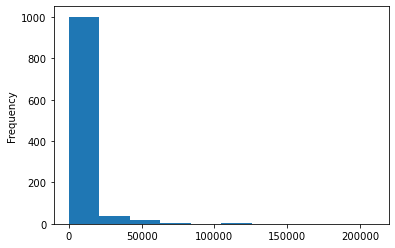

In [75]:
#ax = df.plot.hist(bins=12, alpha=0.5)
histogram = readablesnapshot['total students'].plot.hist(bins=10)

In [76]:
#Ok I can see that there seem so be a small number of schools with a much larger number of students.
#Let's see which schools they are
readablesnapshot[readablesnapshot['total students'] > 100000]

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
85,NORTHSIDE ISD,15915,015 BEXAR,20,B,120,105797,6.6,68.0,18.8,...,2.3,1.0,1.7,0.9,0.7,20.9,"50,000 and over",Major Urban,"$442,675 to < $456,961",$1.3050 to under $1.4272
280,DALLAS ISD,57905,057 DALLAS,10,B,232,155030,22.0,69.6,5.6,...,2.2,0.5,1.2,1.1,0.6,23.9,"50,000 and over",Major Urban,"$639,298 to < $741,925",$1.1701 to under $1.3050
521,CYPRESS-FAIRBANKS ISD,101907,101 HARRIS,4,B,87,116245,18.6,44.4,24.1,...,2.6,0.5,1.3,2.4,0.8,25.5,"50,000 and over",Major Suburban,"$413,609 to < $442,675",$1.4272 and over
525,HOUSTON ISD,101912,101 HARRIS,4,B,279,209040,23.3,62.0,9.0,...,1.9,0.4,0.6,1.3,1.1,27.3,"50,000 and over",Major Urban,"$741,925 to < $786,525",$1.1701 to under $1.3050


In [77]:
readablesnapshot['total students'].min()

38

In [78]:
readablesnapshot[readablesnapshot['total students'] < 100]

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
126,MARATHON ISD,22902,022 BREWSTER,18,A,1,55,0.0,60.0,38.2,...,3.2,0.0,2.1,3.8,4.2,38.7,Under 500,Rural,"$786,525 and over",Under $1.1701
321,PATTON SPRINGS ISD,63906,063 DICKENS,17,B,1,97,3.1,44.3,52.6,...,2.9,0.2,4.0,0.4,1.2,49.0,Under 500,Rural,"$786,525 and over",Under $1.1701
622,DELL CITY ISD,115903,115 HUDSPETH,19,D,1,72,0.0,62.5,37.5,...,0.3,0.0,3.2,0.0,0.0,46.3,Under 500,Rural,"$786,525 and over",Under $1.1701
650,VALENTINE ISD,122902,122 JEFF DAVIS,18,A,1,38,0.0,71.1,21.1,...,1.9,0.0,4.8,0.2,4.9,32.0,Under 500,Rural,"$786,525 and over",Under $1.1701
784,LOHN ISD,160905,160 MCCULLOCH,15,B,1,75,0.0,41.3,56.0,...,6.7,0.2,3.0,0.4,0.7,35.8,Under 500,Rural,"$250,173 to < $272,534",$1.1701 to under $1.3050
1147,KELTON ISD,242905,242 WHEELER,16,A,1,90,1.1,37.8,55.6,...,4.0,0.0,0.5,1.0,6.2,42.8,Under 500,Rural,"$786,525 and over",Under $1.1701


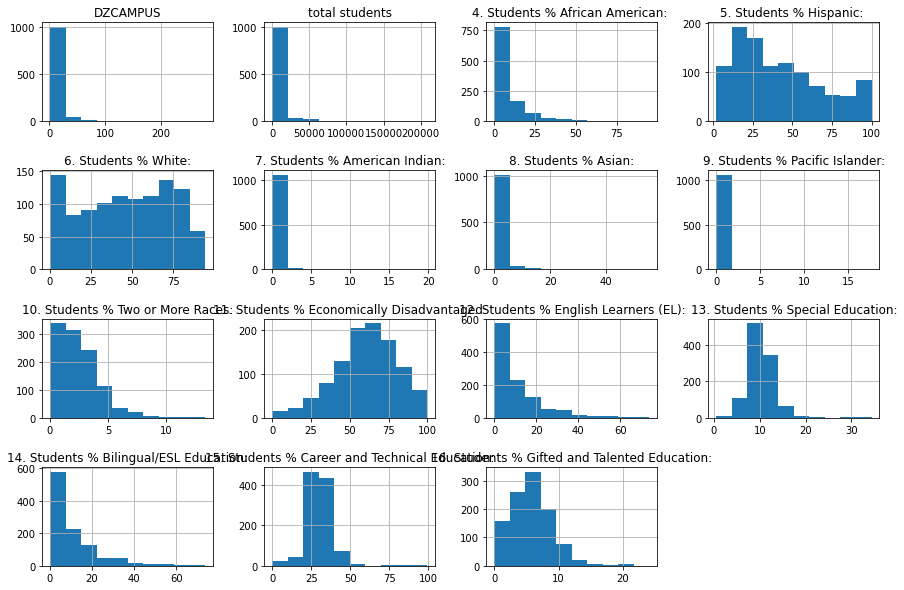

In [79]:
#This explains why the standard deviation is so high in certain categories that would relate to student populations. 
#Let's look at some other numeric features to see if there are any outliers
readablesnapshot.iloc[:,4:20].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

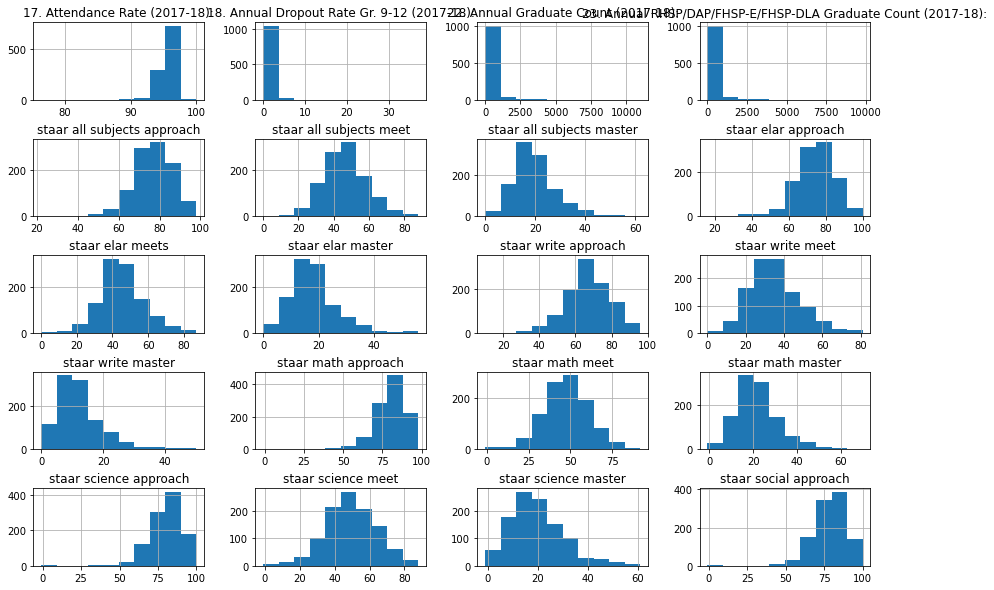

In [80]:
readablesnapshot.iloc[:,20:40].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

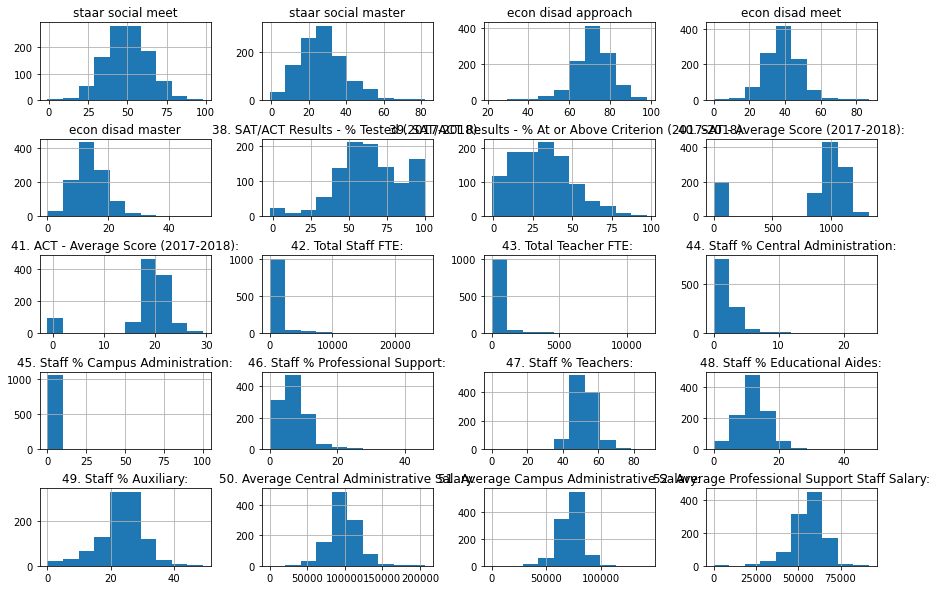

In [81]:
readablesnapshot.iloc[:,40:60].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

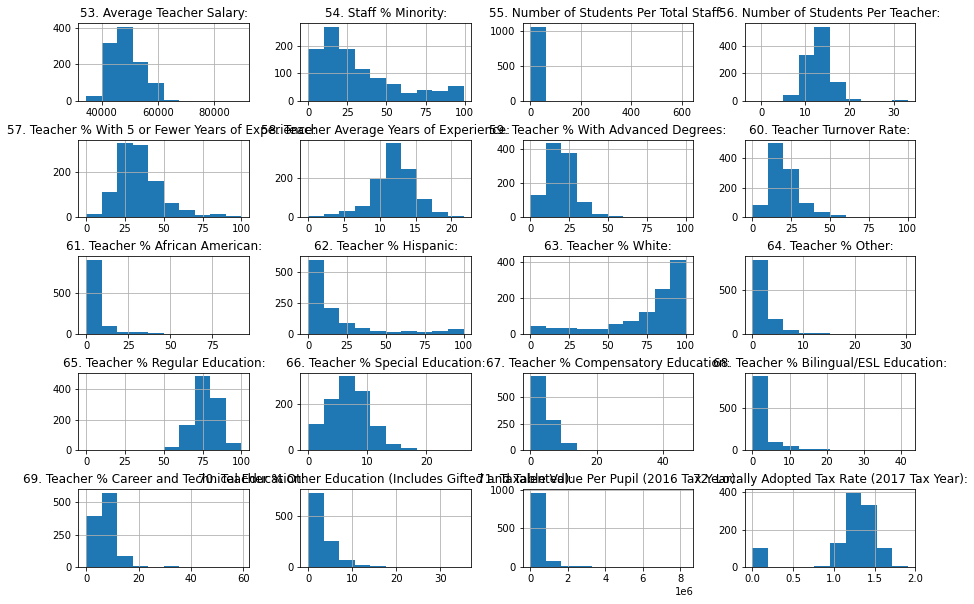

In [82]:
#ACT average score stands out as odd
readablesnapshot.iloc[:,60:80].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

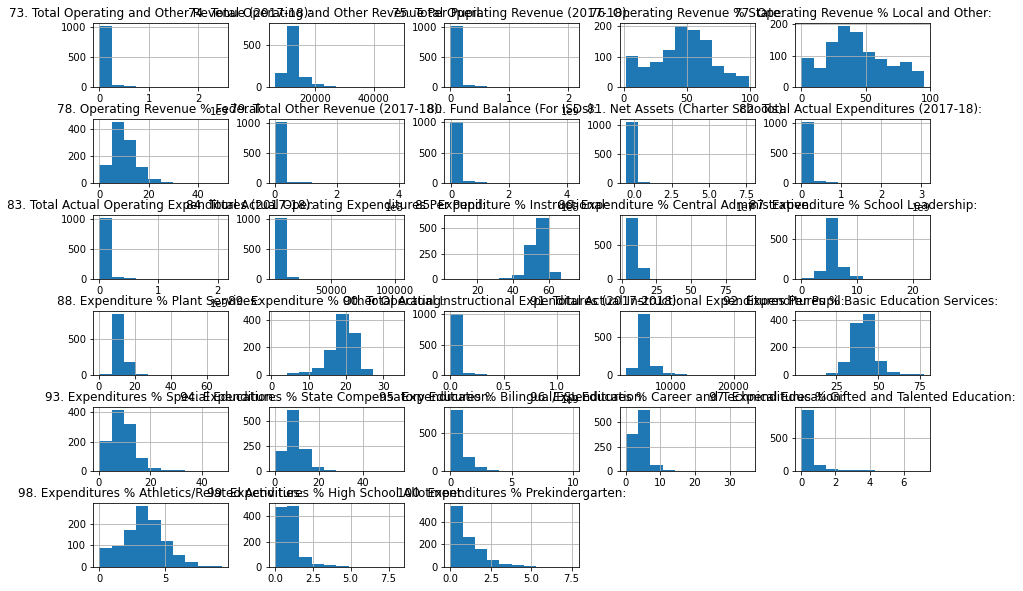

In [83]:
#Number of students per total staff may need some closer examination. Something is driving the graph into the 600's. 
readablesnapshot.iloc[:,80:-5].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

To do:
-take a closer look at ACT average score and total number of students per staff to see where the outliers are
-create a racial difference column by:
1- taking the difference between each %race teacher and %race students per district to make difference per race columns
2- if the number is negative x = x+2x
3- take the average of each race and use it to create average racial difference column to see how it affects grad rates

In [84]:
readablesnapshot[readablesnapshot['55. Number of Students Per Total Staff: ']>100 ]

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
268,RICHLAND COLLEGIATE HIGH SCHOOL,57840,057 DALLAS,10,A,1,592,24.7,29.6,17.7,...,12.1,0.0,0.0,3.8,0.0,8.7,500 to 999,Charters,Non-taxing entities,Non-taxing entities


In [85]:
readablesnapshot.loc[readablesnapshot['55. Number of Students Per Total Staff: '] > 100, ['DISTNAME','55. Number of Students Per Total Staff: ']]
#df.loc[df['a'] > 10, ['a','c']]


,DISTNAME,55. Number of Students Per Total Staff:
268,RICHLAND COLLEGIATE HIGH SCHOOL,615.0


In [86]:
description.head()

,count,mean,std,min,25%,50%,75%,max
DISTRICT #,1067.0,123953.454545,73363.631071,1902.0,61852.5,113906.0,184903.50,254902.0
REGION,1067.0,10.556701,5.293569,1.0,7.0,11.0,15.00,20.0
DZCAMPUS,1067.0,8.089972,17.592728,1.0,2.0,3.0,6.00,279.0
total students,1067.0,5023.809747,13631.436300,38.0,450.0,1079.0,3265.00,209040.0
4. Students % African American:,1067.0,7.518650,11.418823,0.0,0.7,2.7,10.25,94.9


In [87]:
descriptionindex = description.reset_index()
descriptionindex.head()

,index,count,mean,std,min,25%,50%,75%,max
0,DISTRICT #,1067.0,123953.454545,73363.631071,1902.0,61852.5,113906.0,184903.50,254902.0
1,REGION,1067.0,10.556701,5.293569,1.0,7.0,11.0,15.00,20.0
2,DZCAMPUS,1067.0,8.089972,17.592728,1.0,2.0,3.0,6.00,279.0
3,total students,1067.0,5023.809747,13631.436300,38.0,450.0,1079.0,3265.00,209040.0
4,4. Students % African American:,1067.0,7.518650,11.418823,0.0,0.7,2.7,10.25,94.9


In [88]:
descriptionindex.loc[descriptionindex['index'] == '55. Number of Students Per Total Staff: ']
#Is seems I also have a district where the min is 0. Let's see what's up

,index,count,mean,std,min,25%,50%,75%,max
59,55. Number of Students Per Total Staff:,1067.0,7.316041,18.677741,0.0,5.8,6.7,7.6,615.0


In [89]:
readablesnapshot.loc[readablesnapshot['55. Number of Students Per Total Staff: '] < 1, ['DISTNAME','55. Number of Students Per Total Staff: ']]

,DISTNAME,55. Number of Students Per Total Staff:
194,IMAGINE INTERNATIONAL ACADEMY OF N,0.0


In [90]:
#These outliers must be in error. I'll remove both districts just to be sure
rid_imagine = readablesnapshot['DISTNAME'] == 'IMAGINE INTERNATIONAL ACADEMY OF N'

In [91]:
readablesnapshot = readablesnapshot[~rid_imagine]

In [92]:
rid_richland = readablesnapshot['DISTNAME'] == 'RICHLAND COLLEGIATE HIGH SCHOOL'
readablesnapshot = readablesnapshot[~rid_richland]

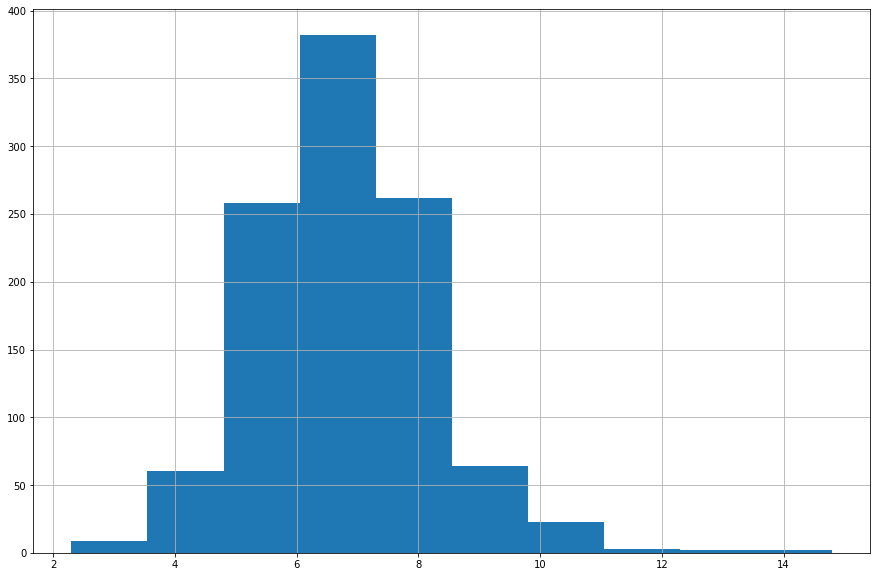

In [93]:
readablesnapshot.loc[:, '55. Number of Students Per Total Staff: '].hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5)
#That's MUCH better!

In [94]:
readablesnapshot[readablesnapshot['43. Total Teacher FTE: ']>10000 ]
#The total teachers FTE column seemed odd, but it makes sense for the two largest districts in the state to have so many teachers
#This should also be the case for any statistic that would involve the number of students


,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:,...,96. Expenditures % Career and Technical Education:,97. Expenditures % Gifted and Talented Education:,98. Expenditures % Athletics/Related Activities:,99. Expenditures % High School Allotment:,100. Expenditures % Prekindergarten:,101. Expenditures % Un-Allocated:,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
280,DALLAS ISD,57905,057 DALLAS,10,B,232,155030,22.0,69.6,5.6,...,2.2,0.5,1.2,1.1,0.6,23.9,"50,000 and over",Major Urban,"$639,298 to < $741,925",$1.1701 to under $1.3050
525,HOUSTON ISD,101912,101 HARRIS,4,B,279,209040,23.3,62.0,9.0,...,1.9,0.4,0.6,1.3,1.1,27.3,"50,000 and over",Major Urban,"$741,925 to < $786,525",$1.1701 to under $1.3050


In [95]:
#Double checking on the largest schools
readablesnapshot.loc[readablesnapshot['23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):'] > 5000, ['DISTNAME','23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):']]

,DISTNAME,23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):
85,NORTHSIDE ISD,6074.0
280,DALLAS ISD,6687.0
399,FORT BEND ISD,5186.0
521,CYPRESS-FAIRBANKS ISD,6443.0
525,HOUSTON ISD,9788.0


In [96]:
#Now let's make sure there are no low outliers
readablesnapshot.loc[readablesnapshot['23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):'] < 1, ['DISTNAME','23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):']]

,DISTNAME,23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):
133,MAY ISD,0.0
562,LAPOYNOR ISD,0.0
1081,THE EXCEL CENTER,0.0


In [97]:
#There are three schools with NO graduates. Taking a closer look at one of them
may_isd = readablesnapshot[readablesnapshot['DISTNAME'] == 'MAY ISD']
may_isd.iloc[:,0:10]

,DISTNAME,DISTRICT #,DZCNTYNM,REGION,DZRATING,DZCAMPUS,total students,4. Students % African American:,5. Students % Hispanic:,6. Students % White:
133,MAY ISD,25905,025 BROWN,15,B,2,266,1.9,20.7,74.8


In [98]:
may_isd.iloc[:,10:20]

,7. Students % American Indian:,8. Students % Asian:,9. Students % Pacific Islander:,10. Students % Two or More Races:,11. Students % Economically Disadvantaged:,12. Students % English Learners (EL):,13. Students % Special Education:,14. Students % Bilingual/ESL Education:,15. Students % Career and Technical Education:,16. Students % Gifted and Talented Education:
133,0.0,0.0,0.4,2.3,69.5,2.3,9.4,2.3,35.0,6.8


In [99]:
may_isd.iloc[:,20:30]

,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,22. Annual Graduate Count (2017-18):,23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):,staar all subjects approach,staar all subjects meet,staar all subjects master,staar elar approach,staar elar meets,staar elar master
133,96.0,0.0,26.0,0.0,76.0,45.0,16.0,75.0,49.0,21.0


In [100]:
#Wait no. These schools must just not participate in the RHSP ect program. Let's examine straight graduate count instead
readablesnapshot.loc[readablesnapshot['22. Annual Graduate Count (2017-18):'] < 1, ['DISTNAME','22. Annual Graduate Count (2017-18):']]

,DISTNAME,22. Annual Graduate Count (2017-18):


In [101]:
#This looks good. Now to check out the odd ACT score
testtype = readablesnapshot.loc[readablesnapshot['41. ACT - Average Score (2017-2018):'] < 1, ['DISTNAME','41. ACT - Average Score (2017-2018):']]
type(testtype.iloc[1,1])

numpy.float64

In [102]:
#Lot's of negative results. Taking a look at the snapshot report for ELKHART ISD the document
#Indicates that these numbers were masked to protect student confidentiality. Too few students took the ACT at these districts
readable2 = readablesnapshot.replace(float('-1'),np.NaN, inplace=False)

In [103]:
missing = pd.concat([readable2.isnull().sum(), 100 * readable2.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')
missing[missing['%']>0 ]

,count,%
staar math approach,1,0.093897
staar math meet,1,0.093897
staar math master,1,0.093897
staar science approach,1,0.093897
staar science meet,1,0.093897
staar science master,1,0.093897
staar social approach,3,0.281690
staar social meet,3,0.281690
staar social master,3,0.281690
38. SAT/ACT Results - % Tested (2017-2018):,7,0.657277


In [123]:
missingcols = ['staar math approach',
'staar math meet',
'staar math master',
'staar science approach',
'staar science meet',
'staar science master',
'staar social approach',
'staar social meet',
'staar social master',
'38. SAT/ACT Results - % Tested (2017-2018):',
'39. SAT/ACT Results - % At or Above Criterion (2017-2018): ',]

In [117]:
readable2.drop(columns=['40. SAT - Average Score (2017-2018):',
'41. ACT - Average Score (2017-2018):'], inplace= True)

In [132]:
missingcolmeans2 = []
for miss in missingcols:
    missingcolmeans2.append(readable2[miss].mean())

In [133]:
replacewithmeans2 = dict(zip(missingcols, missingcolmeans2))


In [134]:
for i in missingcols:
    readable2[i].fillna(replacewithmeans2[i], inplace=True)

In [135]:
missing = pd.concat([readable2.isnull().sum(), 100 * readable2.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')
missing[missing['%']>0 ]

,count,%


In [138]:
#Now there are no missing values in the whole dataset. 
#Let's drop the categorical data that I couldn't fix.
readable2.iloc[:5,-2:]

,PROPWLTH,TAXRATE
0,"$442,675 to < $456,961",Under $1.1701
1,"$164,221 to < $208,918",$1.3050 to under $1.4272
2,"$272,534 to < $299,260",$1.4272 and over
3,"$272,534 to < $299,260",$1.4272 and over
4,"$299,260 to < $316,695",$1.4272 and over


In [139]:
readable2.drop(columns=['PROPWLTH',
'TAXRATE'], inplace= True)

In [ ]:
#I want to make one extra column to measure racial differences between teachers and students to see if it makes an impact

In [140]:
readable2['afrdiff'] = 0
readable2['hispdiff'] = 0
readable2['whidiff'] = 0
readable2['asndiff'] = 0
readable2['pacdiff'] = 0

DISTNAME
DISTRICT #
DZCNTYNM
REGION
DZRATING
DZCAMPUS
total students
4. Students % African American: 
5. Students % Hispanic: 
6. Students % White:
7. Students % American Indian:
8. Students % Asian:
9. Students % Pacific Islander:
10. Students % Two or More Races:
11. Students % Economically Disadvantaged:
12. Students % English Learners (EL):
13. Students % Special Education:
14. Students % Bilingual/ESL Education:
15. Students % Career and Technical Education:
16. Students % Gifted and Talented Education:
17. Attendance Rate (2017-18):
18. Annual Dropout Rate Gr. 9-12 (2017-18):
22. Annual Graduate Count (2017-18):
23. Annual RHSP/DAP/FHSP-E/FHSP-DLA Graduate Count (2017-18):
staar all subjects approach
staar all subjects meet
staar all subjects master
staar elar approach
staar elar meets
staar elar master
staar write approach
staar write meet
staar write master
staar math approach
staar math meet
staar math master
staar science approach
staar science meet
staar science master
staar

In [153]:
#for row in readable2.iterrows():
    #print(row)
    #affdif = row['4. Students % African American: '] - row['61. Teacher % African American:']
    #if affdif > 0:
        #row['affdif'] = affdif

In [163]:
affdif = readable2['4. Students % African American: '] - readable2['61. Teacher % African American:']


In [169]:
readable2['affdif'] = affdif

In [181]:
readable2['affdif'] = readable2['affdif'] .abs()

In [183]:
hispdif = readable2['5. Students % Hispanic: '] - readable2['62. Teacher % Hispanic:']
whidif = readable2['6. Students % White:'] - readable2['63. Teacher % White:']
othdif = ((readable2['7. Students % American Indian:'] + readable2['7. Students % American Indian:'] + 
readable2['8. Students % Asian:'] + readable2['9. Students % Pacific Islander:']) / 4) - readable2['64. Teacher % Other:']

In [186]:
hispdif = hispdif.abs()
whidif = whidif.abs()
othdif = othdif.abs()

In [187]:
readable2['hispdif'] = hispdif
readable2['whidif'] = whidif
readable2['othdif'] = othdif

In [188]:
readable2['Racial Dif Stu/Tea'] = (readable2['affdif'] + readable2['hispdif'] + readable2['whidif'] + readable2['othdif']) / 4

In [190]:
readable2.drop(columns=['affdif',
'hispdif', 'whidif', 'othdif'], inplace= True)

In [191]:
#I now have a column that summarizes the average difference in racial makeup between students and teachers

To summarize what I've done to this dataframe:

-renamed the columns for readability
-removed columns with a high % of missing data
-Imputed the mean for columns with a low amount of missing data
-Graphed the data to look for erroneous entries and removed those rows
-Dropped categorical data that was not useful
-Created a new column to measure racial differences between students and staff (I'm just curious to see if this will impact
graduation rates)

In [192]:
readable2.to_csv('wrangled_snapshot.csv')